# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2024
# Lab 9: Hilser
# April 26, 2024

#  Enzyme Kinetics

The goal of this lab is to practice fitting kinetic models to experimental data.

## Libraries you will need

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Problem 1A:

We are going to deal with reactions where a reactant (A) is being converted into a product (B) under different reaction orders.

Create plots of the concentration of A ([A]) vs. time (0 ≤ t ≤ 10) for a zero order, first order, and second order decay reaction in one figure, setting the starting concentration ([A]0) and t1/2 equal to one. Be sure to label the axes and add a legend that identifies the individual plots.

**NOTE: The concentration of A cannot be below zero!**

## <font color='red'>Student Input Cell: 5 points</font>

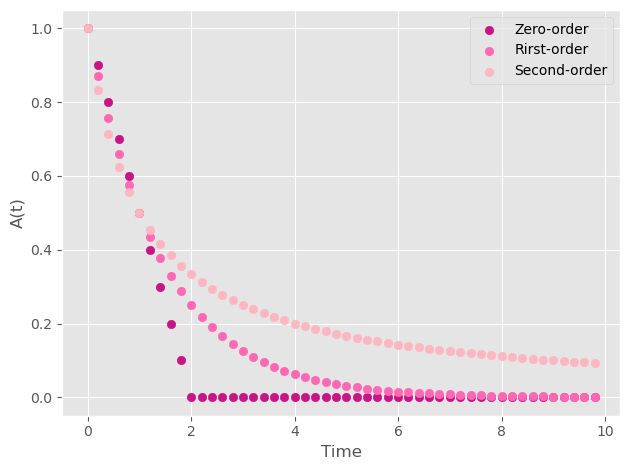

In [14]:
# define half life value
t_half = 1
# define starting concentration value
A0 = 1
# create vector containing discrete time values
t = np.arange(0,10,0.2)



# zero-order reaction
# calculate rate constant from half-life
K = A0/(2*t_half)
# calculate concentration of A at time t, zero-order reaction
At = A0 - (K*t)
# correct for the fact that the concentration cannot drop below 0
At[At<0] = 0



# first-order reaction
# calculate rate constant from half-life
K1 = np.log(2)/t_half
# calculate concentration of A at time t, first-order reaction
At_1 = A0 * np.exp(-K1*t)



# second-order reaction
# calculate rate constant from half-life
K2 = 1/(A0*t_half)
# calculate concentration of A at time t, second-order reaction
At_2 = A0/(1+(A0*K2*t))


plt.style.use('ggplot')

plt.scatter(t, At, label = "Zero-order", color = 'mediumvioletred')
plt.scatter(t, At_1, label = "Rirst-order", color = 'hotpink')
plt.scatter(t, At_2, label = "Second-order", color = 'lightpink')

plt.xlabel("Time")
plt.ylabel("A(t)")

plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()

# Problem 1B:
What fraction of the reactant A has been converted into product for each of the reactions at the following time points?

t = 0.1, 0.5, 1, 2, 10

**NOTE: Remember, the fraction of A that has been converted into B CANNOT be >1!**

## <font color='red'>Student Input Cell: 5 points</font>

In [20]:
t = np.array([0.1, 0.5, 1, 2, 10])
# calculate rate constant from half-life
K = A0/(2*t_half)
# calculate concentration of A at time t, zero-order reaction
At = A0 - (K*t)
# correct for the fact that the concentration cannot drop below 0
At[At<0] = 0



# First-order reaction
# calculate rate constant from half-life
K1 = np.log(2)/t_half
# calculate concentration of A at time t, first-order reaction
At_1 = A0 * np.exp(-K1*t)



# Second-order reaction
# calculate rate constant from half-life
K2 = 1/(A0*t_half)
# calculate concentration of A at time t, second-order reaction
At_2 = A0/(1+(A0*K2*t))

print("Zero-order:", A0 - At)
print("First-order:", A0 - At_1)
print("Second-order:", A0 - At_2)

Zero-order: [0.05 0.25 0.5  1.   1.  ]
First-order: [0.06696701 0.29289322 0.5        0.75       0.99902344]
Second-order: [0.09090909 0.33333333 0.5        0.66666667 0.90909091]


# Problem 1C:

Which reaction was faster when t < $t_{1/2}$?

Which reaction was faster when t > $t_{1/2}$?

## <font color='red'>Student Input Cell: 2 points</font>

In [21]:
# Second-order was the faster!
# Zero-order was the faster!

# Problem 2A:

Many kinetic processes can be broken down into several elementary reactions. One example is a sequential reaction in which an intermediate is formed:


<img src="http://www.gordus.org/public_images/intermediate.png" style="width: 300px;"/>

In this case, the conversion of A to B proceeds through an intermediate I. Each reaction is first order.

Let’s say that you can tune experimental conditions such that you can vary $k_{2}$ without affecting $k_{1}$.

Create one figure containing plots of [B] vs. time (for 0 ≤ t ≤ 15 s) for the following combinations of rate constants:

k1 =  0.25 s, k2 =   1.00 s

k1 =  0.25 s, k2 =   3.00 s

k1 =  0.25 s, k2 =  10.00 s

k1 =  0.25 s, k2 =  30.00 s

k1 =  0.25 s, k2 = 100.00 s

## <font color='red'>Student Input Cell: 10 points</font>

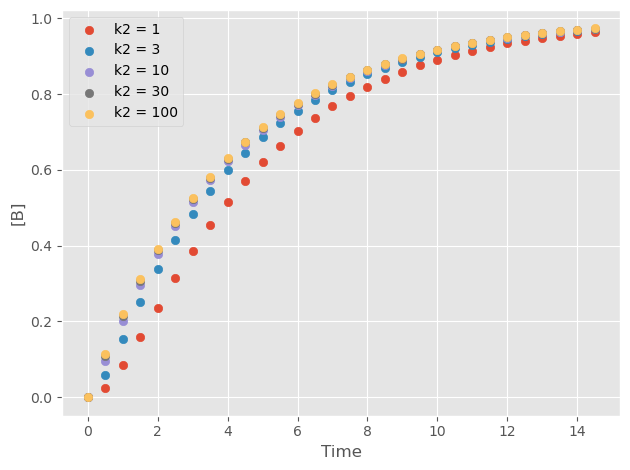

In [24]:
# Create a function for your reaction equation
def two_step_react(A0,k1,k2,t):
    B = A0*(1 - (1/(k2-k1))*(k2 * np.exp(-k1*t)- k1 * np.exp(-k2*t)))

    return B


# Plot the 5 predictions
t = np.arange(0,15,0.5)
A0 = 1
k1 = 0.25 
k2 = 1.00 
plt.style.use('ggplot')
plt.scatter(t,two_step_react(A0,k1,k2,t), label = "k2 = 1")



k1 = 0.25
k2 = 3.00
plt.scatter(t,two_step_react(A0,k1,k2,t), label = "k2 = 3")



k1 = 0.25
k2 = 10.00
plt.scatter(t,two_step_react(A0,k1,k2,t), label = "k2 = 10")


k1 = 0.25
k2 = 30.00
plt.scatter(t,two_step_react(A0,k1,k2,t), label = "k2 = 30")



k1 = 0.25
k2 = 100.00
plt.scatter(t, two_step_react(A0,k1,k2,t), label = "k2 = 100")

plt.xlabel("Time")
plt.ylabel("[B]")

plt.legend(loc = "upper left")

plt.tight_layout()
plt.show()

# Problem 2B:

What are the values of the half-life ($t_{1/2}$) for consumption of A? How do they compare? Why do they not differ by a factor of 100, as $k_{2}$ does?

## <font color='red'>Student Input Cell: 3 points</font>

In [25]:
# Half-life for A:
k1 = 0.25
thalf = np.log(2)/k1
print(thalf)

# How do they compare?
# Answer: They're the same!

# Why do they not differ by a factor of 100?
# Answer: Becuase the half-life of a first order raction is only dependent on k1

2.772588722239781


# Problem 2C:

What are the values of the half-life ($t_{1/2}$) for production of B? How do they compare? Why do they not differ by a factor of 100, as $k_{2}$ does?

This problem will be easier to solve numerically. Below is an example for a first-order reaction where k=1. By defnition, we know that the half life is ln(2)/k.

## Example

In [26]:
def find_half_example(t,A0,k):
    A = np.abs(A0*np.exp(-k*t) - 0.5)
    return A

result = minimize(find_half_example, 1, (1,1))

# half-life
print(result.x)
print(np.log(2))

[0.69314717]
0.6931471805599453


## <font color='red'>Student Input Cell: 10 points</font>

In [30]:
# Compute half-life values
def find_half(t,A0,k1,k2):
    B = (A0*(1 - (1/(k2-k1))*(k2 * np.exp(-k1*t)- k1 * np.exp(-k2*t)))-0.5)**2
    return B

k2 = 1
result = minimize(find_half,1,(1,0.25,k2))
print("k2=1 half-life isz:", result.x)

k2 = 3
result = minimize(find_half,1,(1,0.25,k2))
print("k2=3 half-life is:", result.x)

k2 = 10
result = minimize(find_half,1,(1,0.25,k2))
print("k2=10 half-life is:", result.x)

k2 = 30
result = minimize(find_half,1,(1,0.25,k2))
print("k2=30 half-life is:", result.x)

k2 = 100
result = minimize(find_half,1,(1,0.25,k2))
print("k2=100 half-life is:", result.x)

# Why do they not differ by a factor of 100?
# Answer: Given that k1 is the rate limiting step, changes to k2 do not proportionally affect the half-life

k2=1 half-life isz: [3.86763057]
k2=3 half-life is: [3.12052143]
k2=10 half-life is: [2.87385794]
k2=30 half-life is: [2.80605997]
k2=100 half-life is: [2.78259959]
